In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\ACADS\DM\data_mining_project\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
missing_values=["N/A",np.nan,"na"]
df = pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\ACADS\DM\data_mining_project\Crop_recommendation.csv',na_values=missing_values)

In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


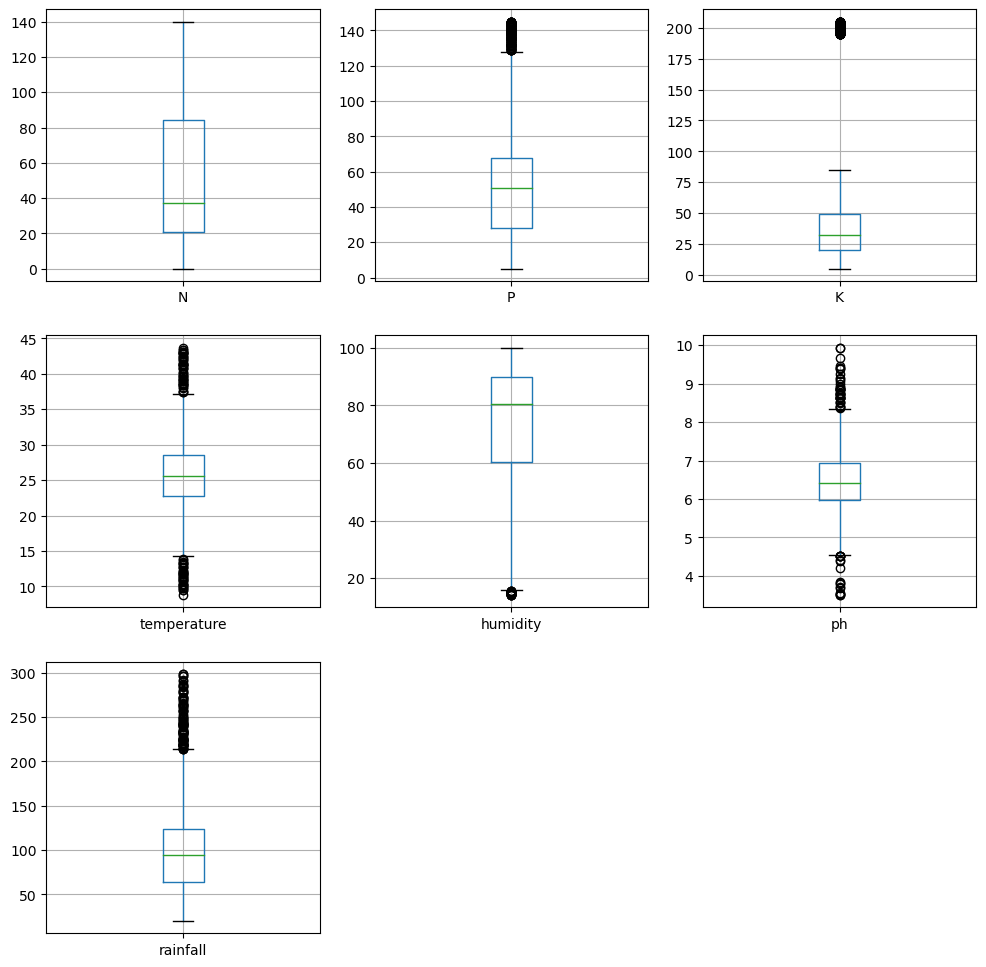

In [6]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

In [10]:
# Calculate Q1, Q3, and IQR for all columns except the last one
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are NOT outliers
mask = ~((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR)))

# Apply the mask to df, keeping all rows in the last column
df_no_outliers = df[mask.all(axis=1)]
df_no_outliers

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features from the labels
features = df_no_outliers.iloc[:, :-1]
labels = df_no_outliers.iloc[:, -1]

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the labels back into the DataFrame
df_scaled['label'] = labels.values
df_scaled

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.411111,0.4750,0.286836,0.786537,0.515697,0.946048,rice
1,0.664286,0.566667,0.3875,0.424416,0.787180,0.642575,0.854623,rice
2,0.671429,0.500000,0.4000,0.496859,0.770640,0.632999,0.980486,rice
3,0.650000,0.333333,0.4250,0.414715,0.767724,0.639019,0.963266,rice
4,0.635714,0.444444,0.3875,0.306376,0.768395,0.499748,0.855763,rice
...,...,...,...,...,...,...,...,...
1763,0.764286,0.322222,0.3375,0.545515,0.601446,0.588729,0.815778,coffee
1764,0.707143,0.111111,0.2750,0.573708,0.485366,0.406032,0.557682,coffee
1765,0.842857,0.311111,0.3125,0.429542,0.611085,0.478696,0.792729,coffee
1766,0.835714,0.300000,0.3625,0.523476,0.431832,0.583122,0.553802,coffee


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Separate the features from the labels
features = df_scaled.iloc[:, :-1]
labels = df_scaled.iloc[:, -1]

# Initialize a random forest classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(features, labels)

# Get the feature importances
importances = model.feature_importances_

# Get the feature names
feature_names = features.columns

# Combine the feature names and importances into a dictionary
feature_importances = dict(zip(feature_names, importances))

# Print the feature importances
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance * 100 }% ")

N: 11.874360297343884% 
P: 14.383192788101143% 
K: 16.071170413921497% 
temperature: 7.218814980682049% 
humidity: 21.739845309771923% 
ph: 5.348657577850183% 
rainfall: 23.363958632329336% 


In [17]:
from sklearn.decomposition import PCA

# Initialize a PCA
pca = PCA(n_components=2)

# Separate the features from the labels
features_scaled = df_scaled.iloc[:, :-1]
labels = df_scaled.iloc[:, -1]

# Perform PCA on the scaled features
pca_features = pca.fit_transform(features_scaled)

# Create a new DataFrame for the PCA features
df_pca_scaled = pd.DataFrame(data = pca_features, columns = ['principal component 1', 'principal component 2'])

# Add the labels to the DataFrame
df_pca_scaled['label'] = labels

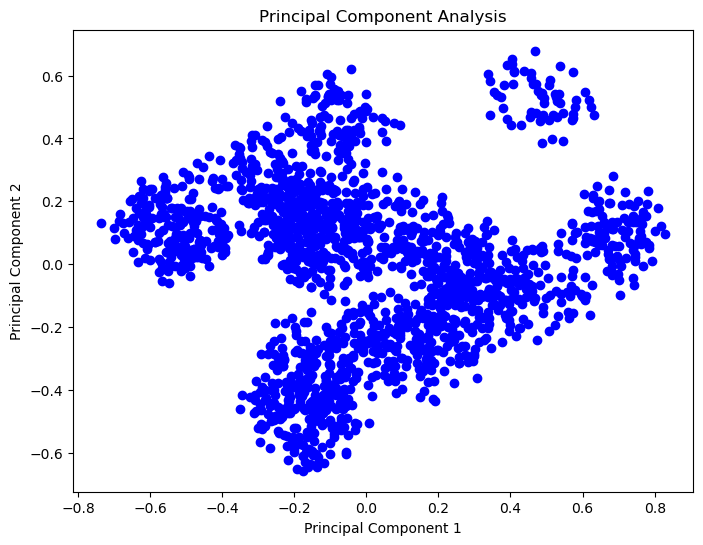

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot of the two principal components
plt.figure(figsize=(8,6))
plt.scatter(df_pca_scaled['principal component 1'], df_pca_scaled['principal component 2'], c='blue')

# Set the title and labels of the plot
plt.title('Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

In [19]:

# Calculate the IQR of each column
Q1 = df_pca_scaled.iloc[:, :-1].quantile(0.25)
Q3 = df_pca_scaled.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
df_pca_no_outliers = df_pca_scaled[~((df_pca_scaled.iloc[:, :-1] < lower_bound) | (df_pca_scaled.iloc[:, :-1] > upper_bound)).any(axis=1)]

print("Data after removing outliers:")
print(df_pca_no_outliers)

Data after removing outliers:
      principal component 1  principal component 2   label
0                 -0.214275               0.156836    rice
1                 -0.163792               0.210531    rice
2                 -0.192125               0.167779    rice
3                 -0.259361               0.096422    rice
4                 -0.172246               0.148251    rice
...                     ...                    ...     ...
1763              -0.221131               0.183547  coffee
1764              -0.211649               0.064359  coffee
1765              -0.249549               0.238864  coffee
1766              -0.178047               0.312678  coffee
1767              -0.244283               0.136484  coffee

[1768 rows x 3 columns]


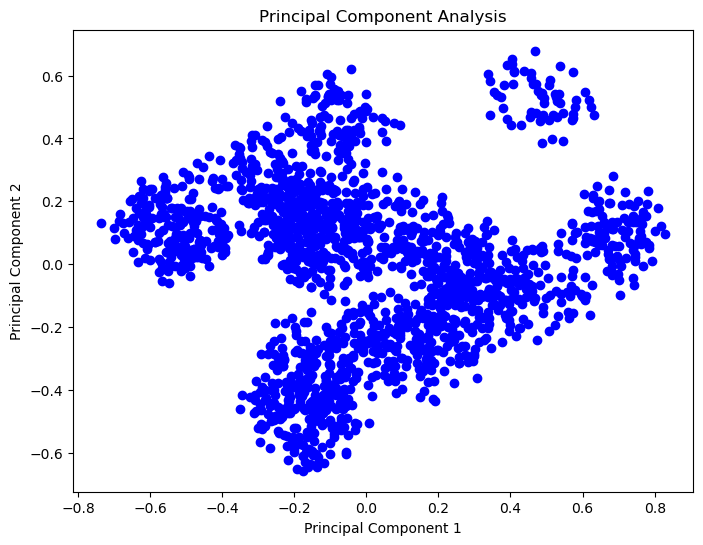

In [20]:
import matplotlib.pyplot as plt

# Create a scatter plot of the two principal components
plt.figure(figsize=(8,6))
plt.scatter(df_pca_no_outliers['principal component 1'], df_pca_no_outliers['principal component 2'], c='blue')

# Set the title and labels of the plot
plt.title('Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

In [41]:

# Get the feature names
feature_names = features_scaled.columns

# Get the loadings
loadings = pca.components_

# Create a DataFrame for the loadings
df_loadings = pd.DataFrame(loadings, columns=feature_names, index=['PC1', 'PC2'])

# For each principal component, get the feature with the highest absolute loading
most_important_features = df_loadings.idxmax(axis=1)

print(most_important_features)

PC1    P
PC2    N
dtype: object


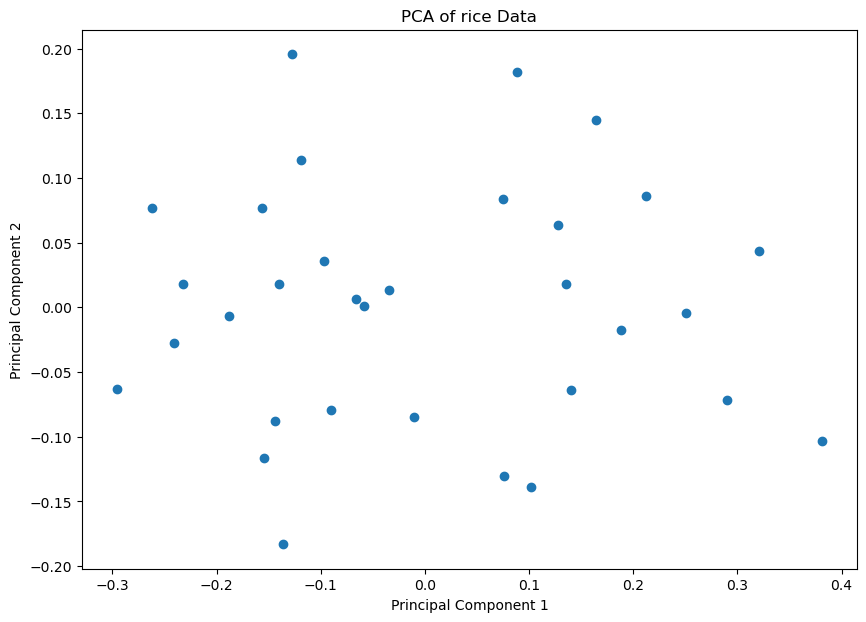

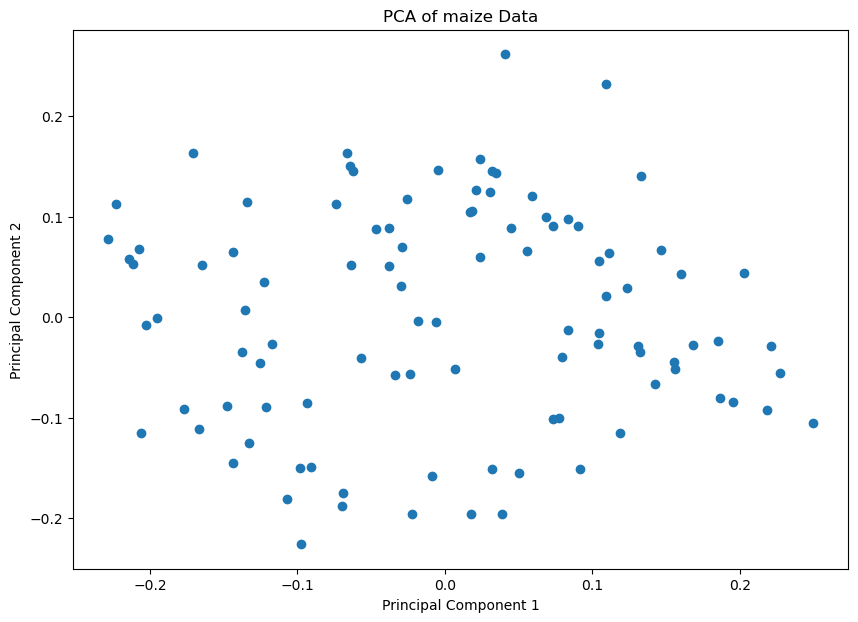

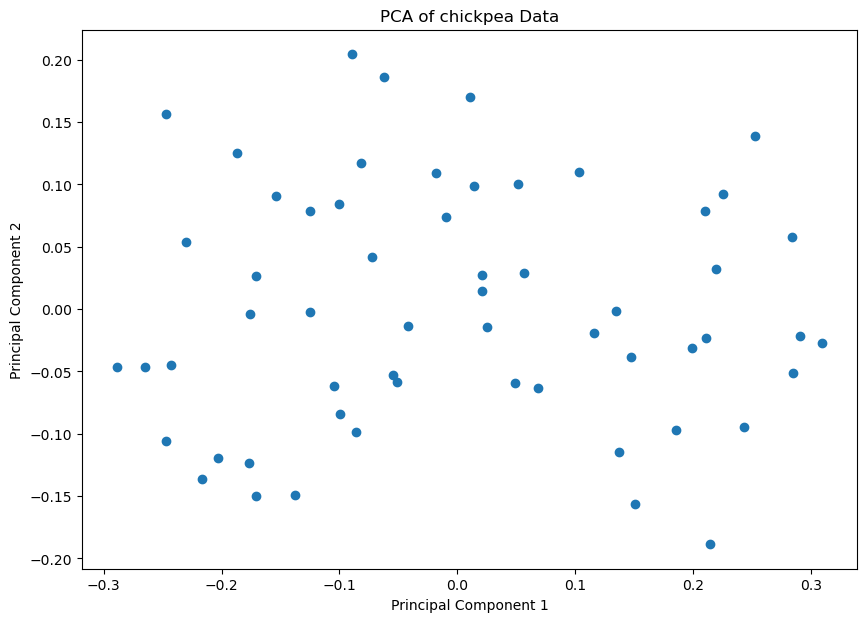

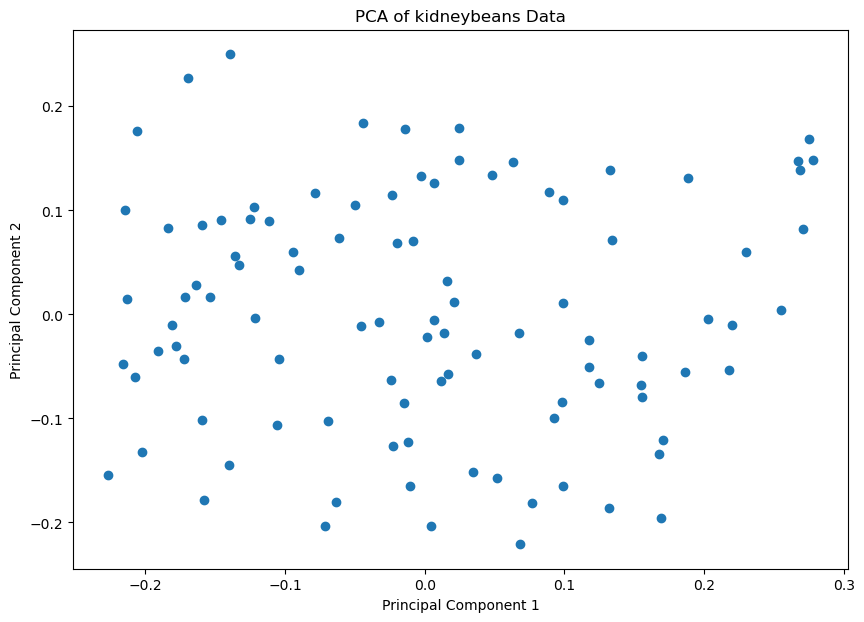

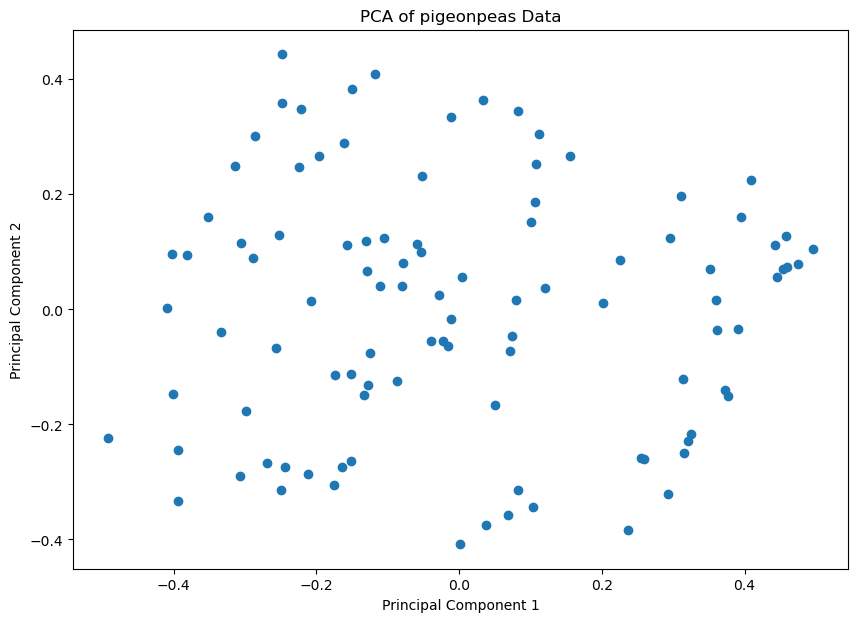

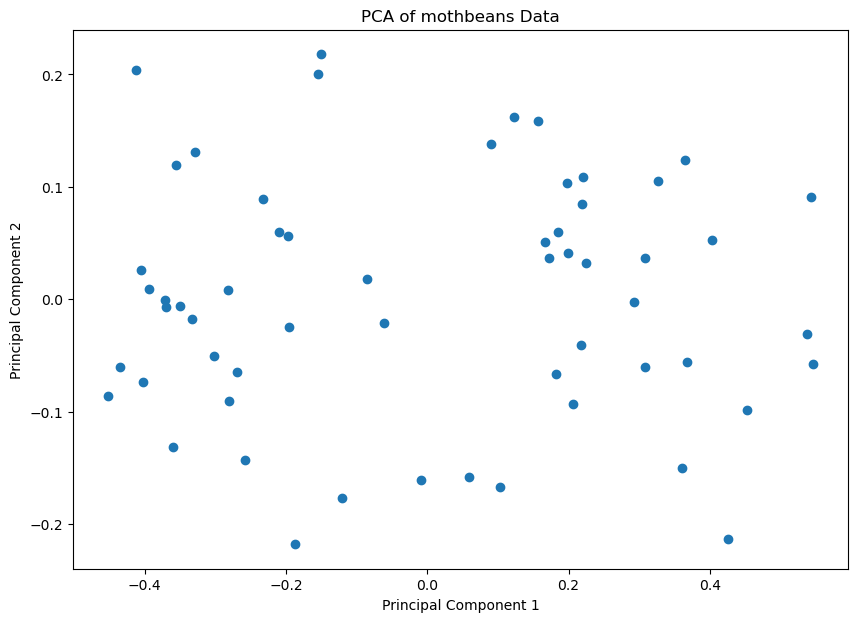

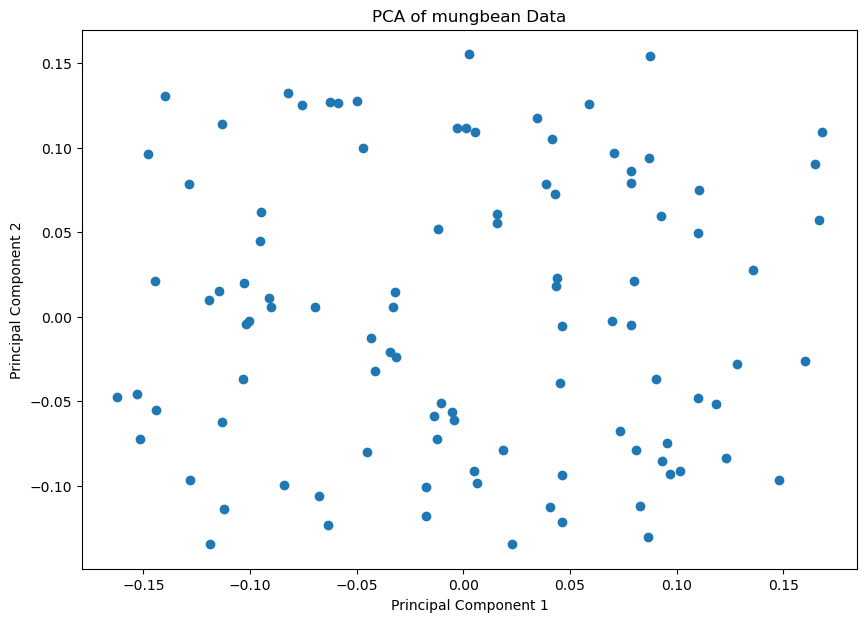

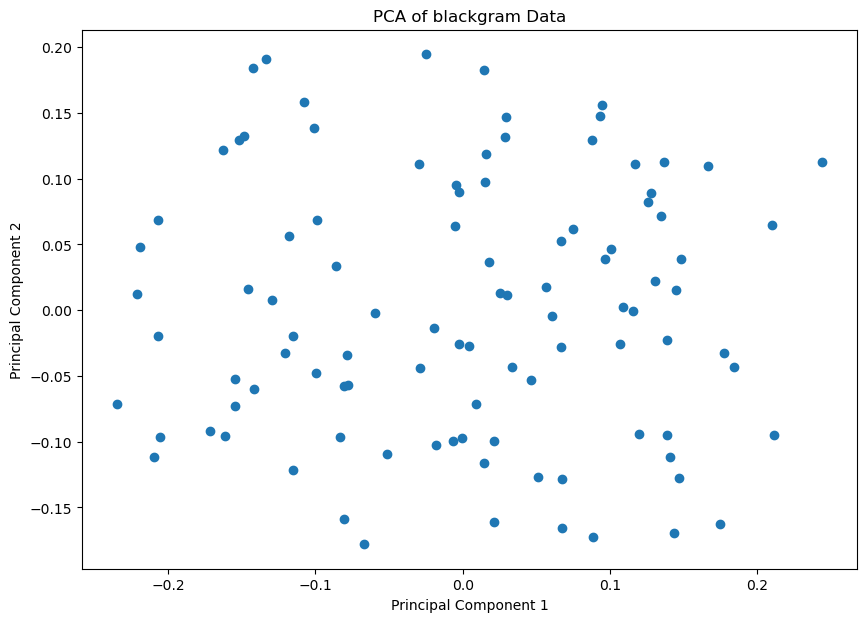

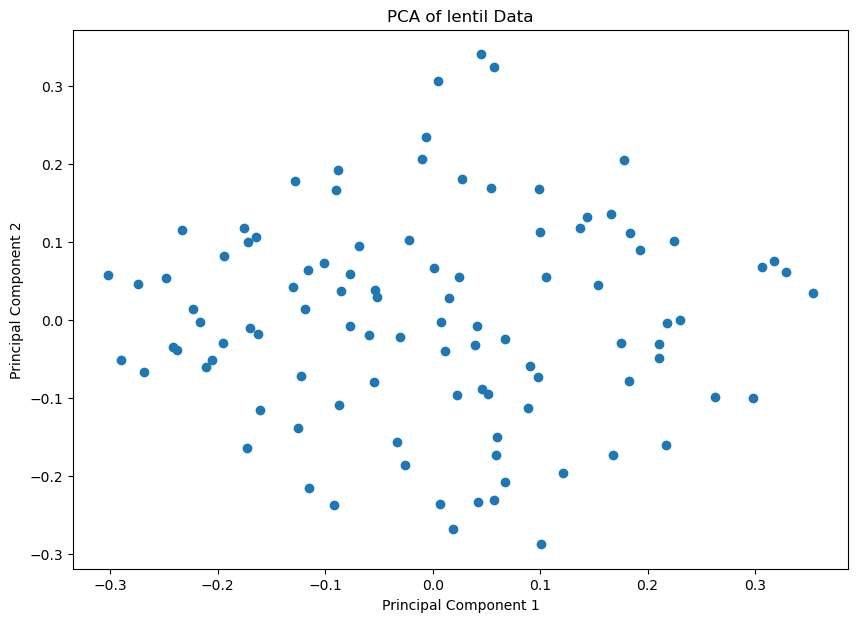

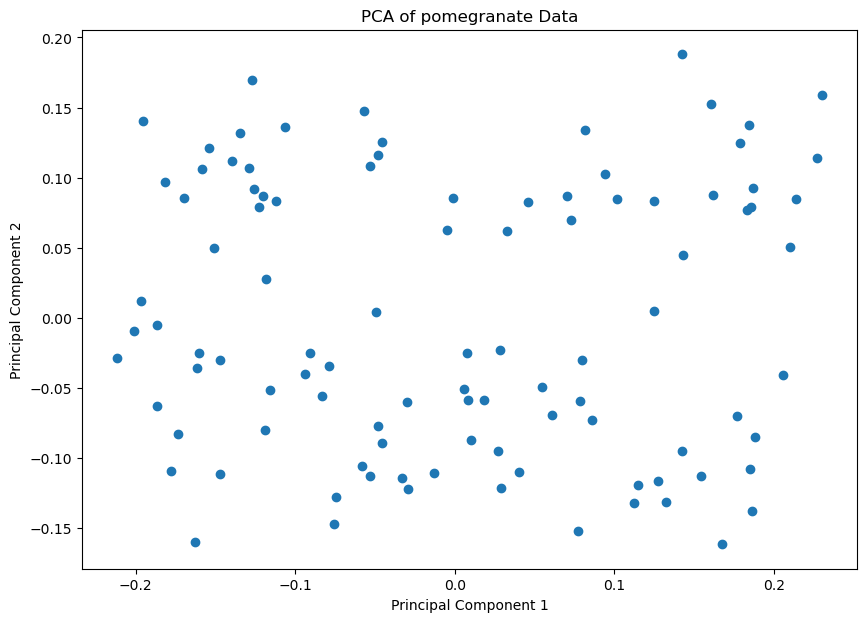

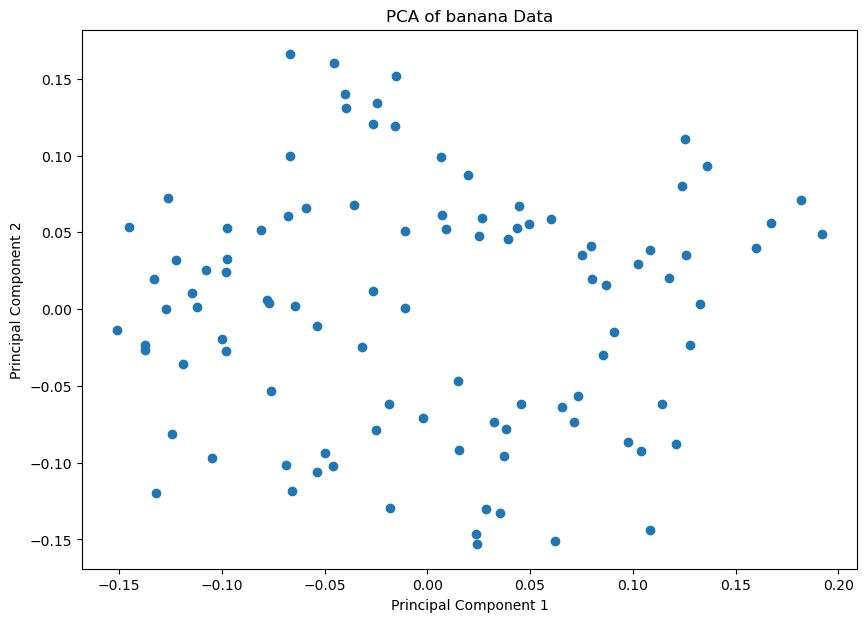

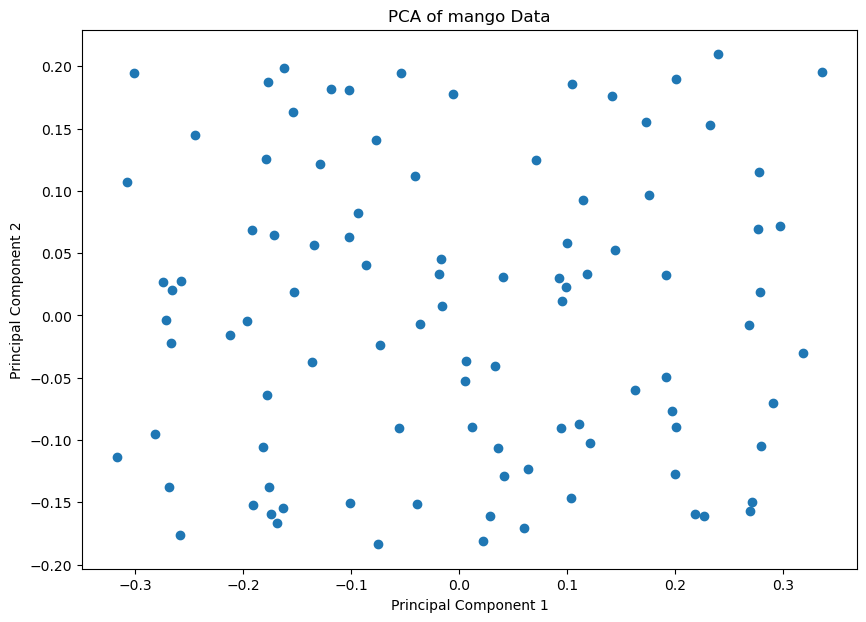

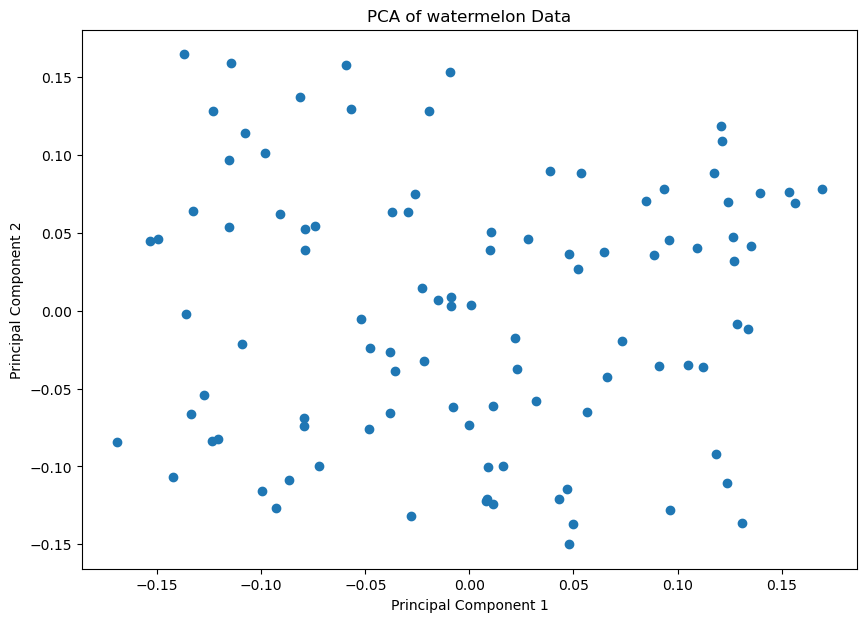

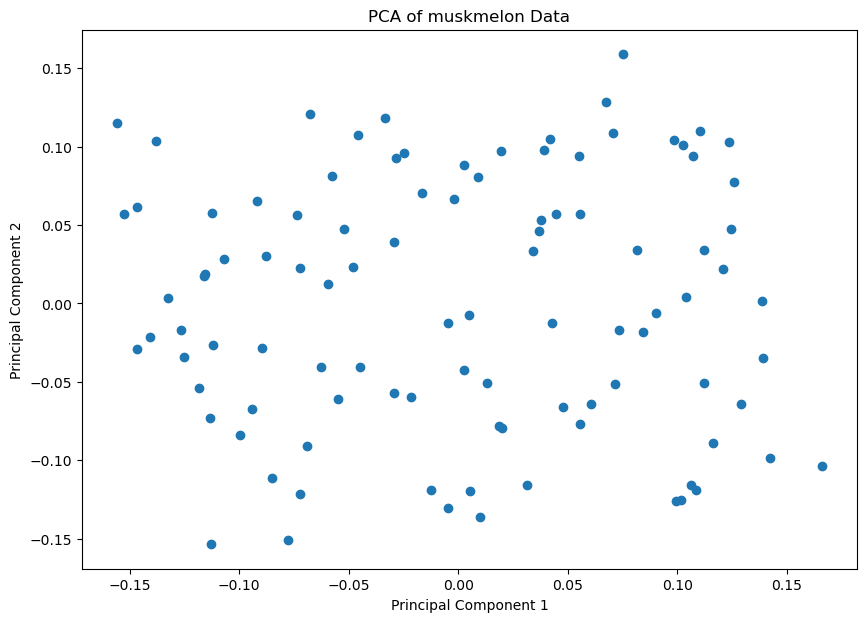

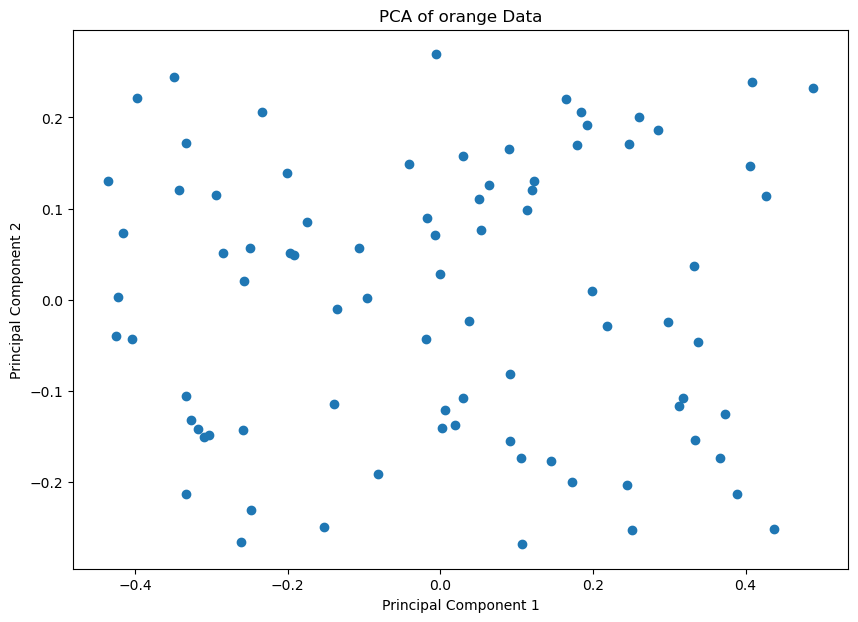

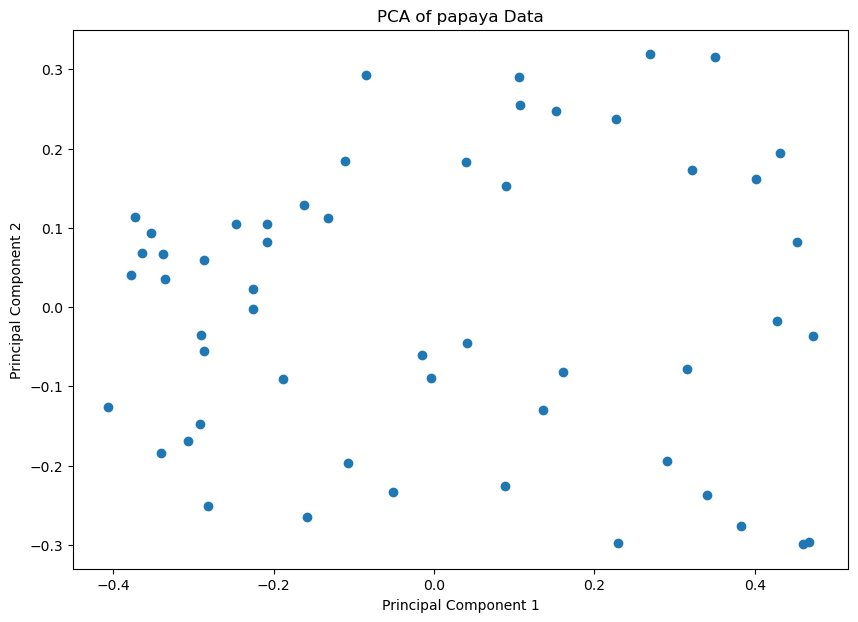

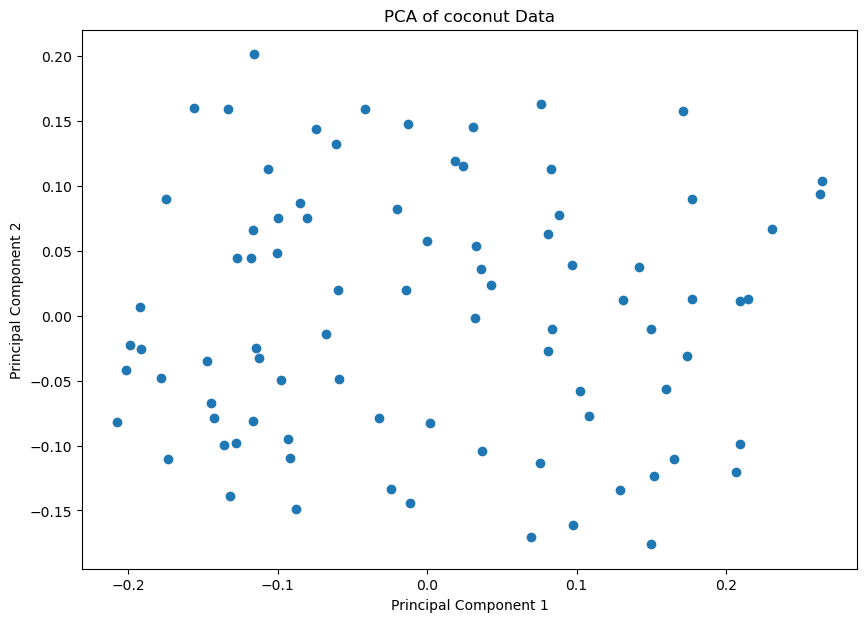

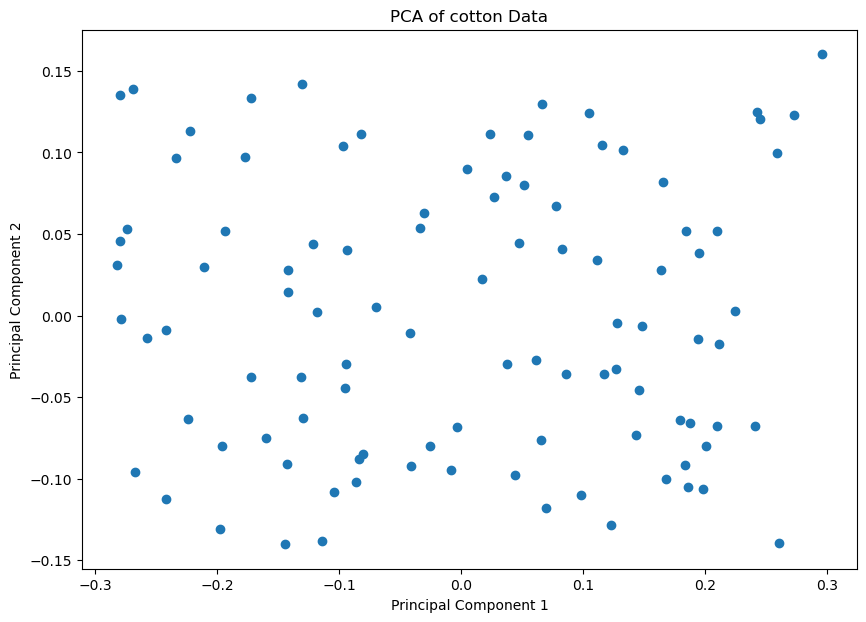

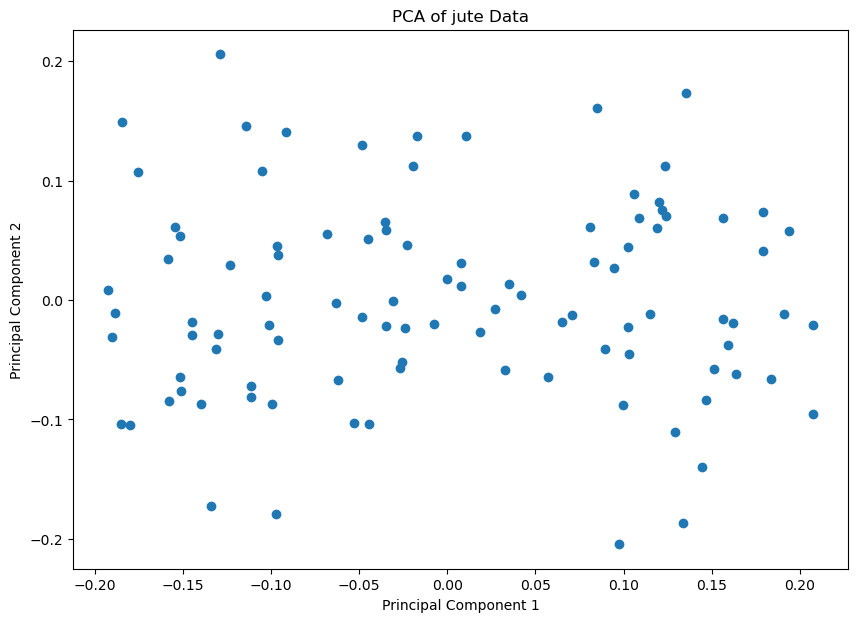

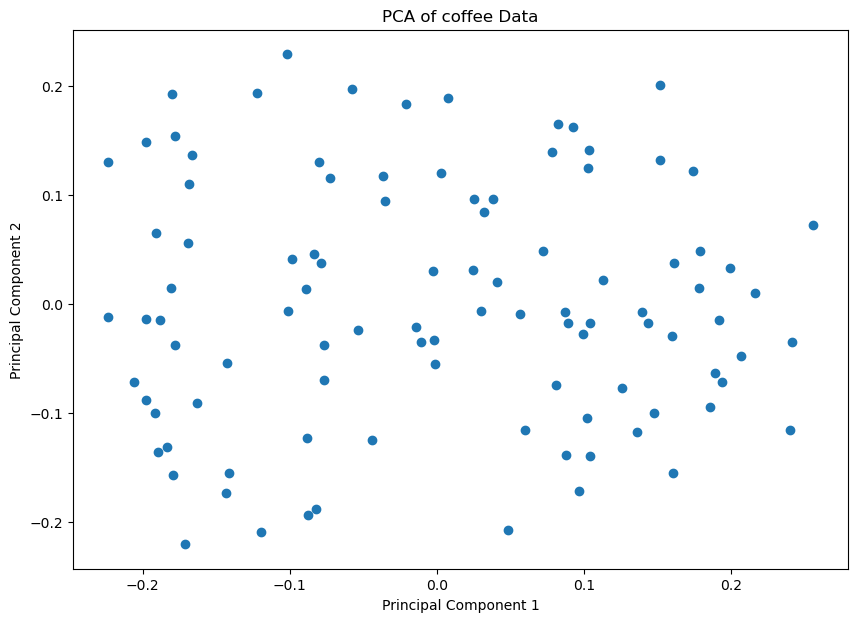

In [27]:


# Convert scaled features back to DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['label'] = labels

# Get the unique labels
unique_labels = labels.unique()

# Initialize a PCA
pca = PCA(n_components=2)

# Loop over the unique labels
for label in unique_labels:
    # Subset the DataFrame for the current label
    subset = df_scaled[df_scaled['label'] == label].iloc[:, :-1]
    
    # Perform PCA on the subset
    pca_features = pca.fit_transform(subset)
    
    # Create a new DataFrame for the PCA features
    df_pca = pd.DataFrame(data = pca_features, columns = ['PC1', 'PC2'])
    
    # Add the labels to the DataFrame
    df_pca['label'] = label
    
    # Create a scatter plot of the PCA features
    plt.figure(figsize=(10, 7))
    plt.scatter(df_pca['PC1'], df_pca['PC2'])
    
    # Add labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of {label} Data')
    
    # Show the plot
    plt.show()

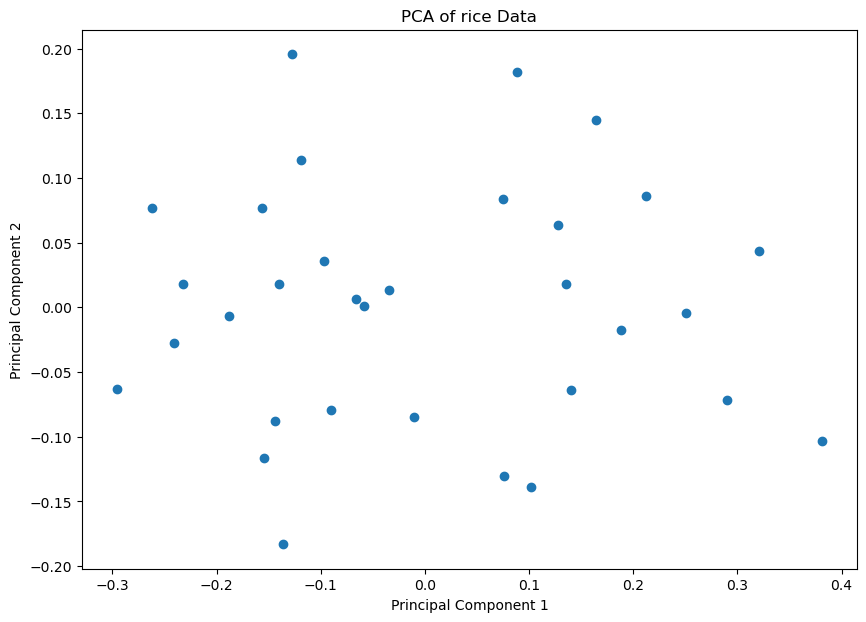

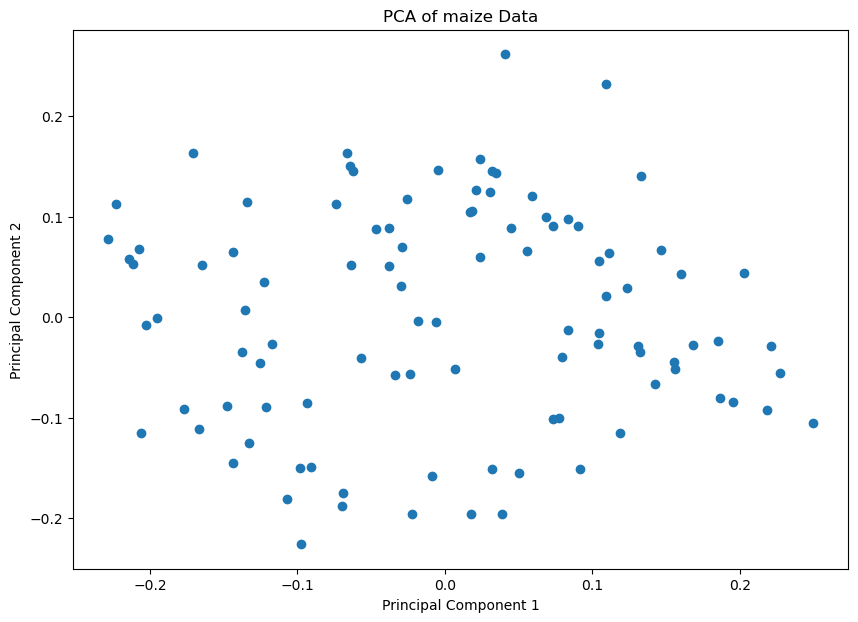

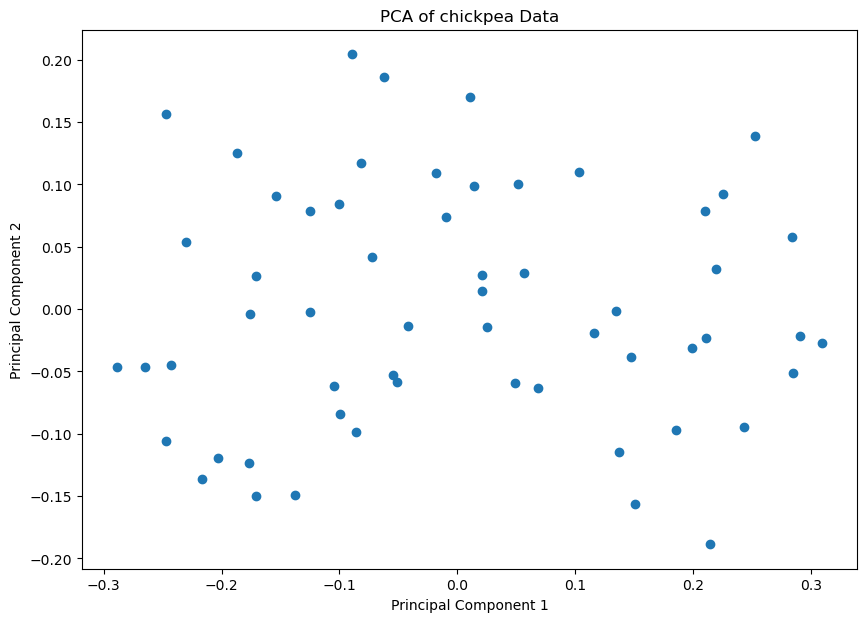

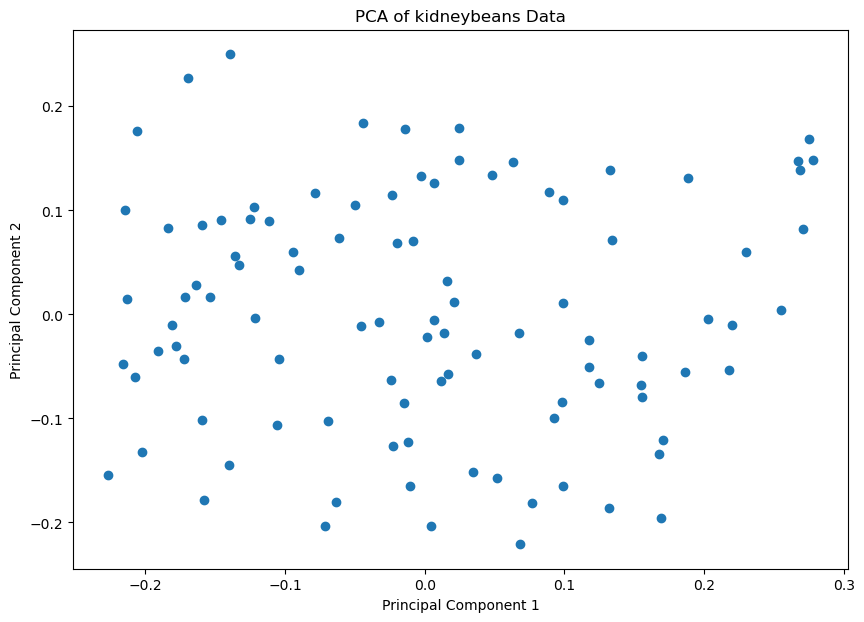

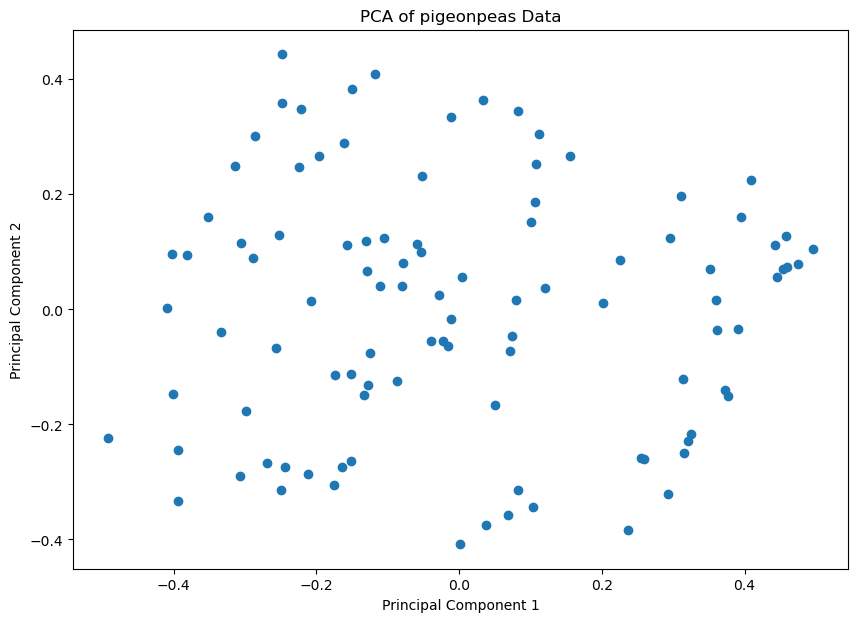

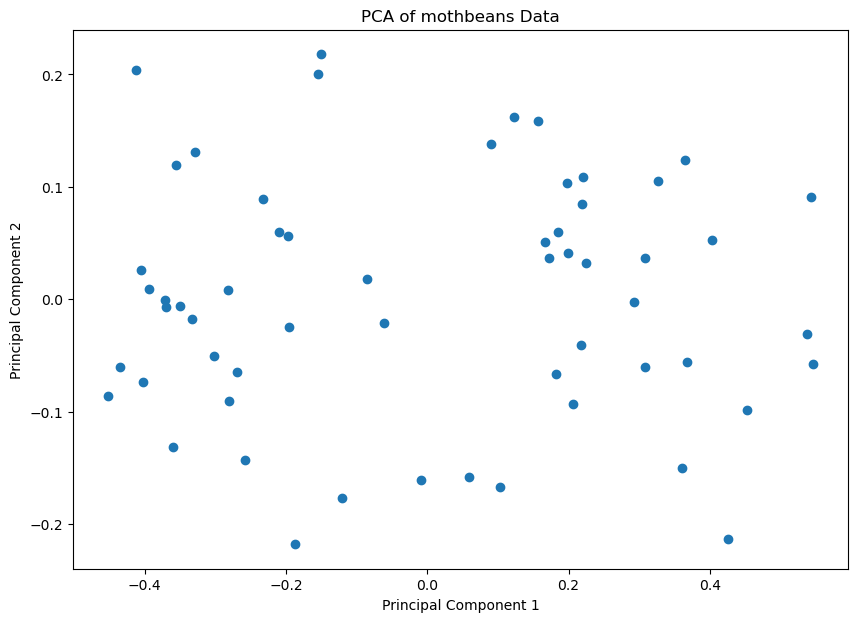

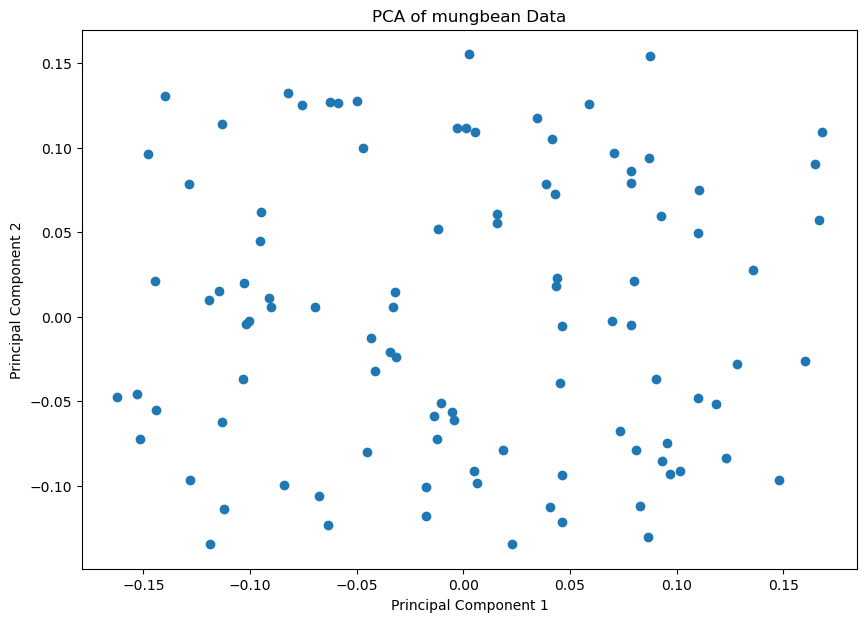

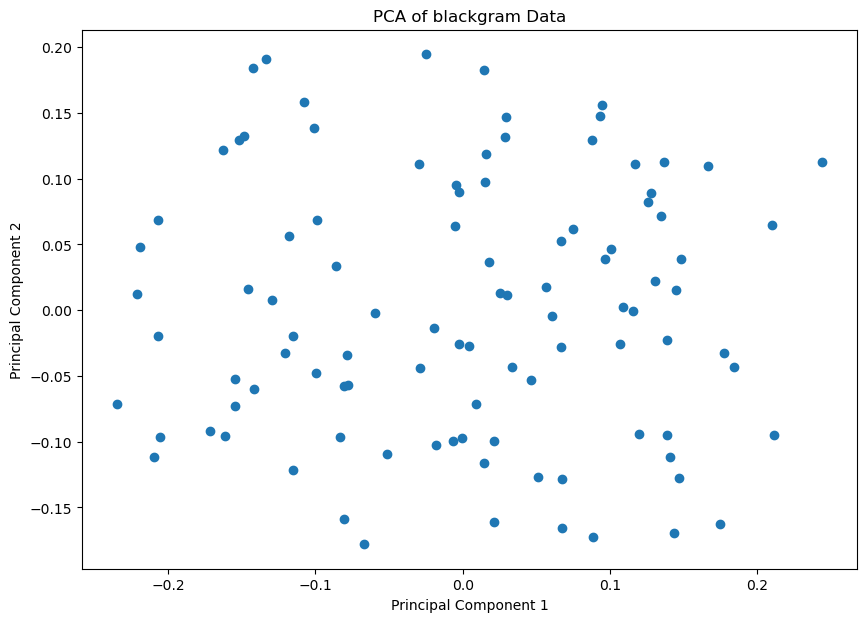

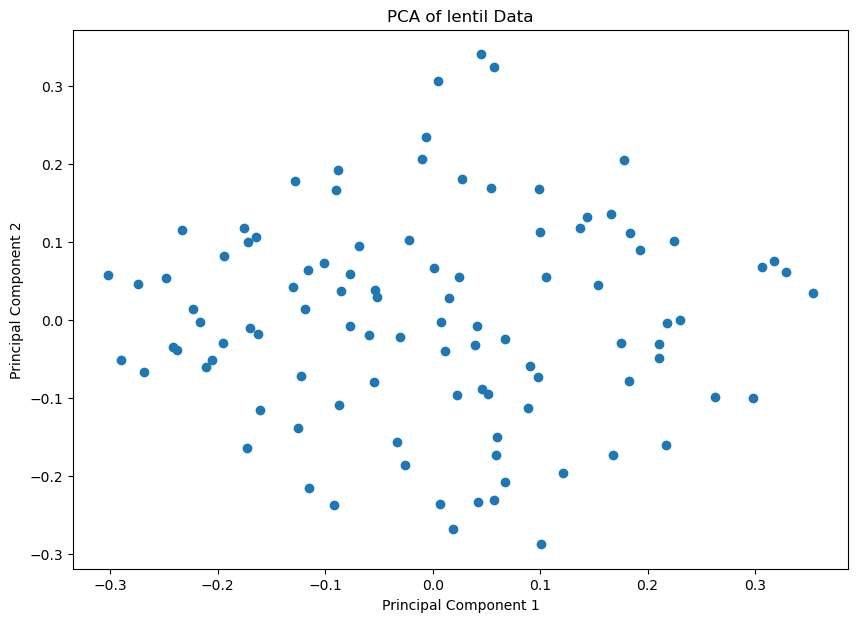

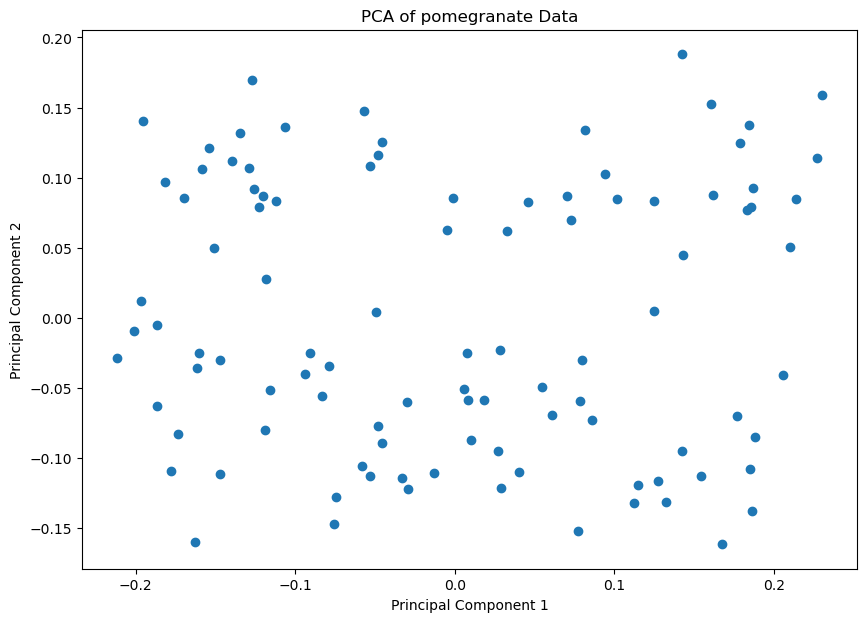

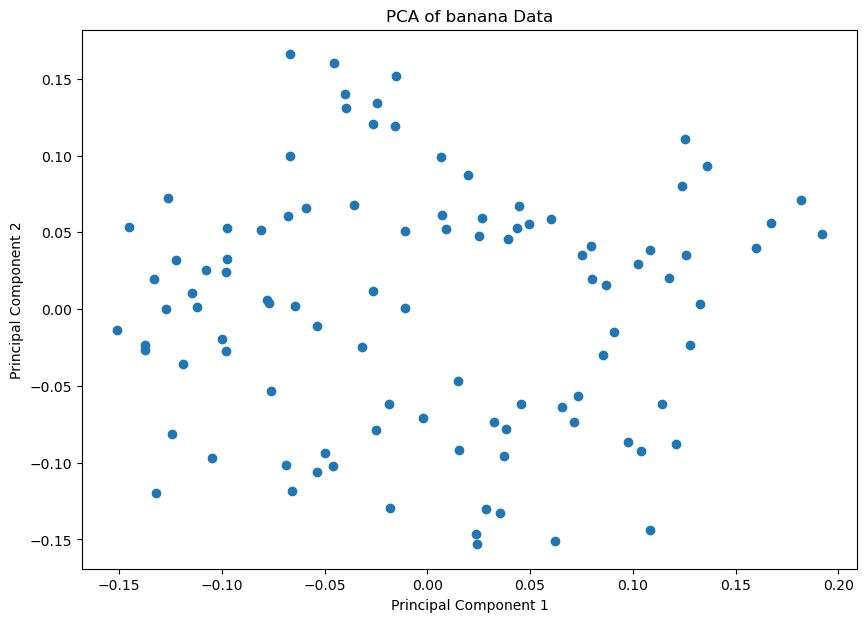

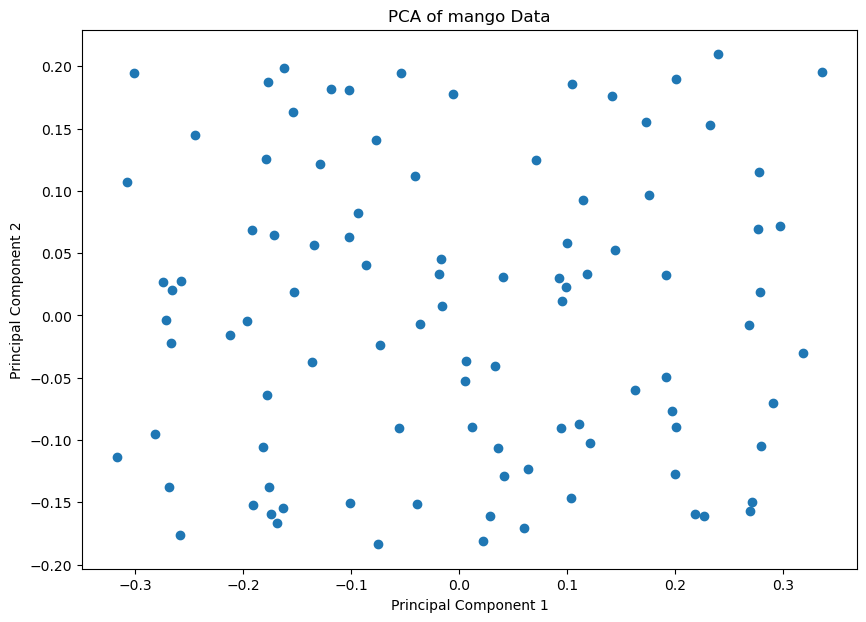

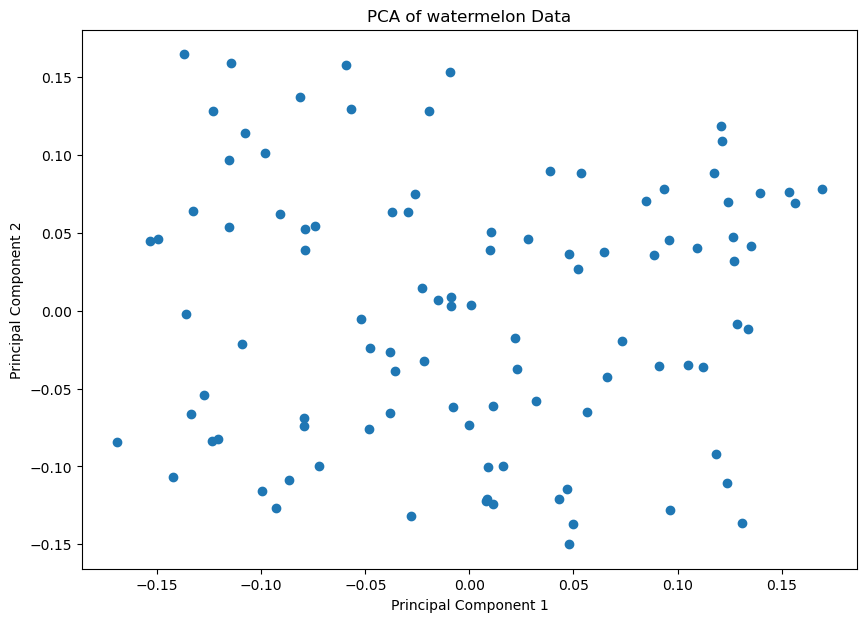

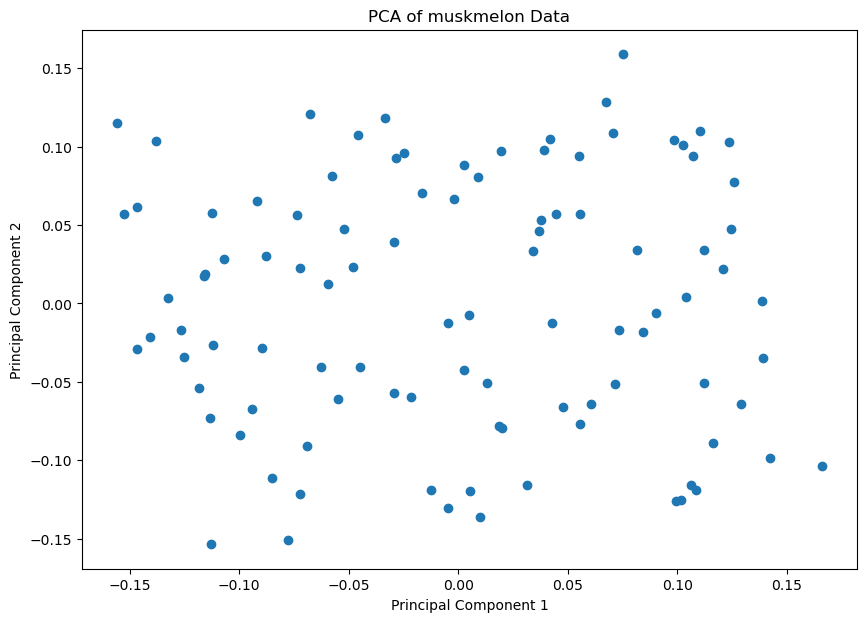

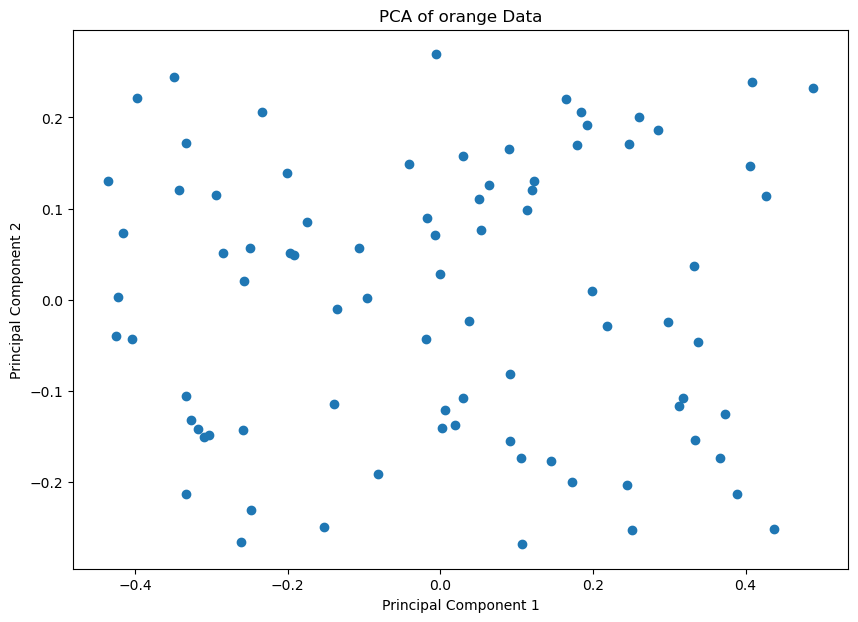

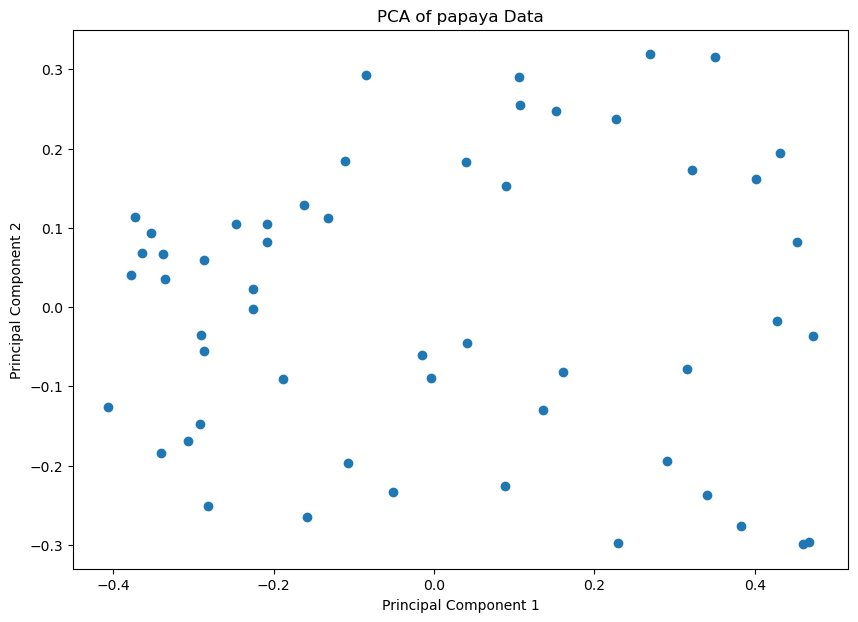

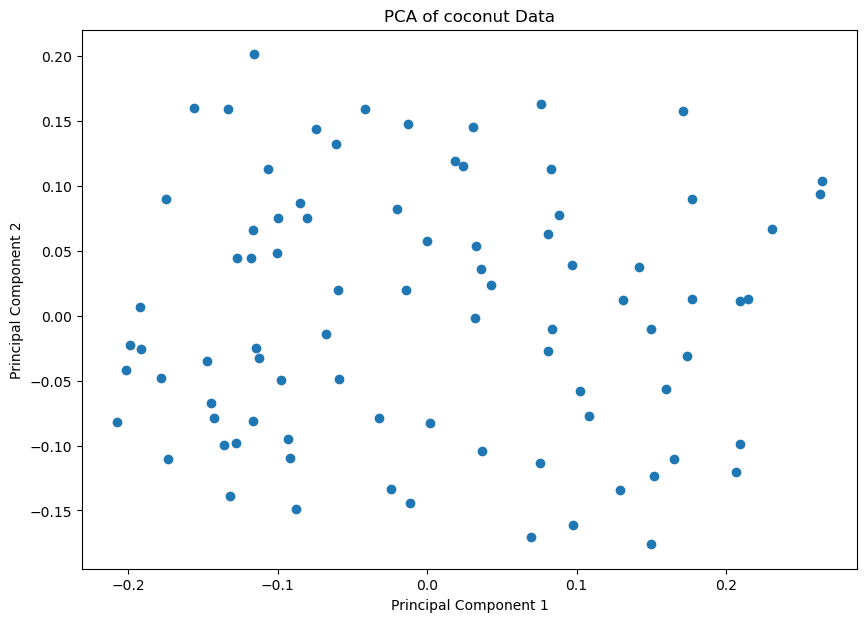

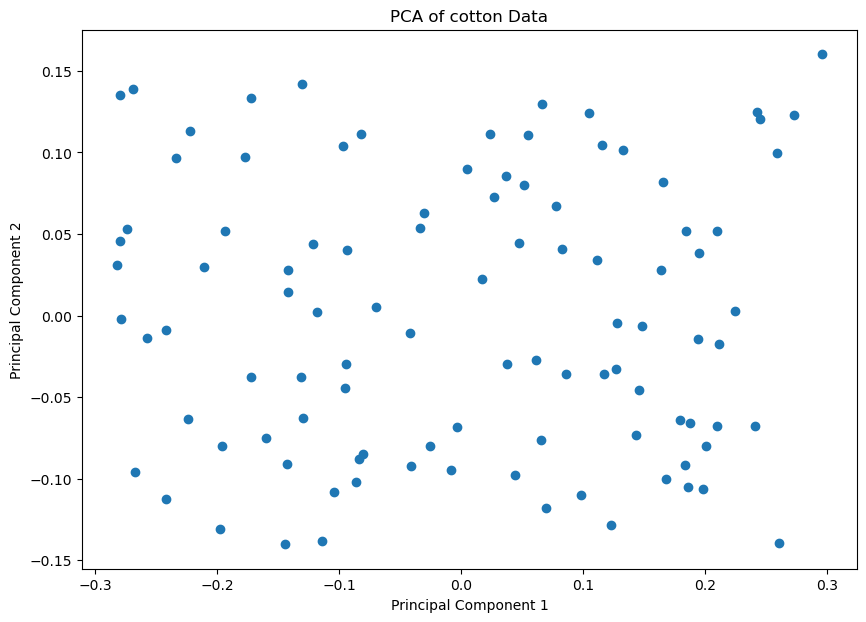

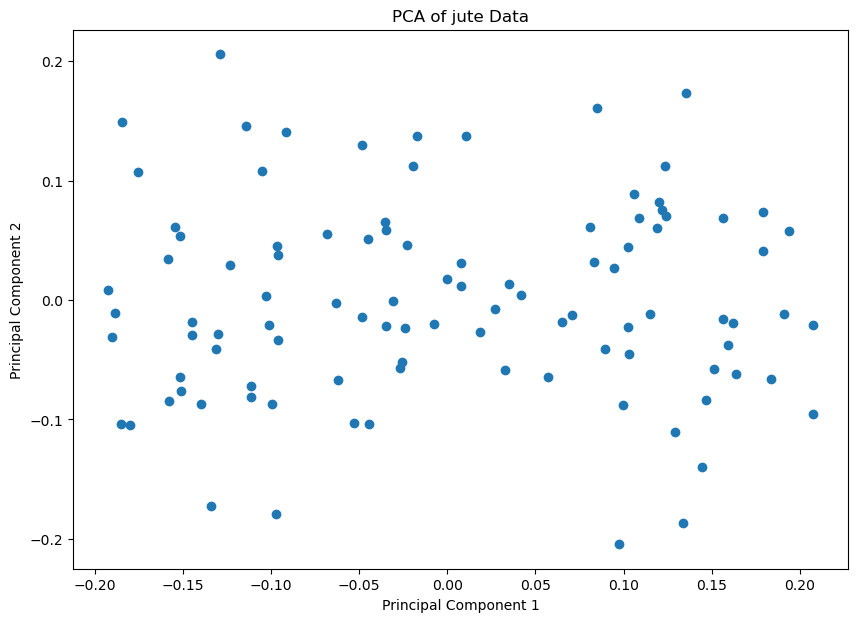

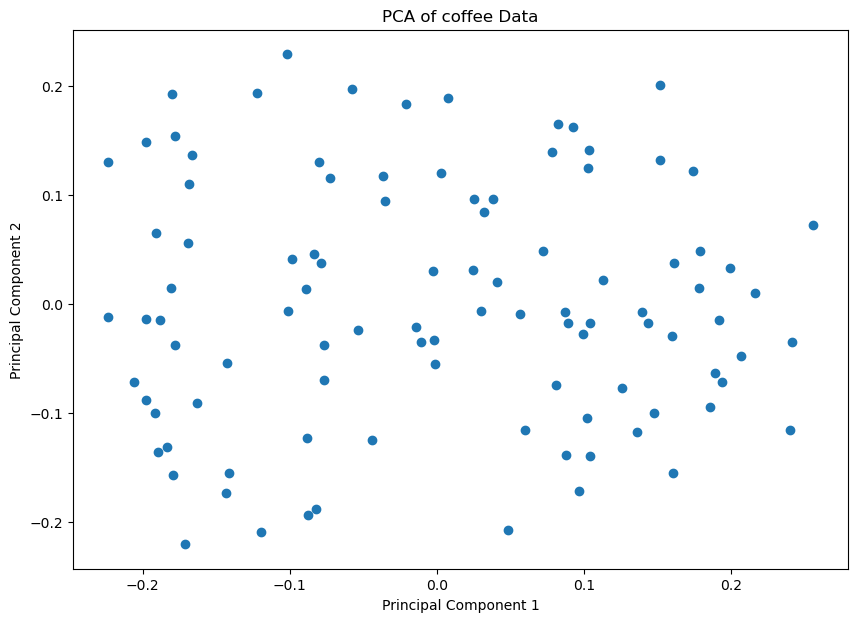

In [33]:
pca_dfs = {}

# Loop over the unique labels
for label in unique_labels:
    # Subset the DataFrame for the current label
    subset = df_scaled[df_scaled['label'] == label].iloc[:, :-1]
    
    # Perform PCA on the subset
    pca_features = pca.fit_transform(subset)
    
    # Create a new DataFrame for the PCA features
    df_pca = pd.DataFrame(data = pca_features, columns = ['PC1', 'PC2'])
    
    # Add the labels to the DataFrame
    df_pca['label'] = label
    
    # Store the DataFrame in the dictionary
    pca_dfs[label] = df_pca
    
    # Create a scatter plot of the PCA features
    plt.figure(figsize=(10, 7))
    plt.scatter(df_pca['PC1'], df_pca['PC2'])
    
    # Add labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of {label} Data')
    
    # Show the plot
    plt.show()

In [37]:
pca_dfs['maize']

,PC1,PC2,label
0,-0.046772,0.087238,maize
1,0.249516,-0.105866,maize
2,0.079365,-0.040195,maize
3,-0.097930,-0.150243,maize
4,-0.202352,-0.008103,maize
...,...,...,...
95,-0.137233,-0.034830,maize
96,0.083199,-0.013055,maize
97,-0.143978,-0.145009,maize
98,-0.121496,-0.089378,maize


In [38]:
# Loop over the unique labels
for label in unique_labels:
    # Subset the DataFrame for the current label
    subset = df_scaled[df_scaled['label'] == label].iloc[:, :-1]
    
    # Perform PCA on the subset
    pca.fit(subset)
    
    # Get the feature importance for each Principal Component
    feature_importance = pd.DataFrame(pca.components_, columns=subset.columns, index=['PC1', 'PC2'])
    
    # Print the feature importance
    print(f"Feature importance for {label} data:")
    print(feature_importance)

Feature importance for rice data:
            N         P         K  temperature  humidity        ph  rainfall
PC1 -0.129662 -0.023602  0.006999     0.195807  0.011139 -0.969700 -0.061642
PC2  0.025180  0.928619 -0.016938    -0.299904 -0.059458 -0.098963  0.182959
Feature importance for maize data:
            N         P         K  temperature  humidity        ph  rainfall
PC1  0.003898 -0.039771 -0.006161     0.866531  0.116822  0.419316  0.240866
PC2  0.248405 -0.216874 -0.016852     0.408383  0.074528 -0.844342 -0.075705
Feature importance for chickpea data:
            N         P         K  temperature  humidity        ph  rainfall
PC1 -0.162189 -0.004211  0.065915     0.034935 -0.006700 -0.983898  0.003306
PC2 -0.677841  0.710836 -0.003651    -0.053232 -0.050615  0.106448 -0.136030
Feature importance for kidneybeans data:
            N         P         K  temperature  humidity        ph  rainfall
PC1  0.058496  0.254322  0.001319     0.197109  0.017307 -0.012516 -0.944769
PC2 -